In [28]:
from transformers import AutoImageProcessor, DeiTModel
import torch
from torch import nn
from torch.utils.data import Dataset
from torchvision import transforms

In [2]:
from transformers import DeiTConfig, DeiTForImageClassification

# Initializing a DeiT deit-base-distilled-patch16-224 style configuration
configuration = DeiTConfig(image_size=48,
 patch_size=16,
  num_classes=7, 
  num_channels=1)


In [16]:
devide = 'cuda' if taorch.cuda.is_available() else 'cpu'

In [20]:

# Initializing a model (with random weights) from the deit-base-distilled-patch16-224 style configuration
model = DeiTForImageClassification(configuration)

# Accessing the model configuration
configuration = model.config

In [21]:
model

DeiTForImageClassification(
  (deit): DeiTModel(
    (embeddings): DeiTEmbeddings(
      (patch_embeddings): DeiTPatchEmbeddings(
        (projection): Conv2d(1, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DeiTEncoder(
      (layer): ModuleList(
        (0-11): 12 x DeiTLayer(
          (attention): DeiTAttention(
            (attention): DeiTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): DeiTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): DeiTIntermediate(
            (dense): Linear(in

In [4]:
model.classifier = nn.Linear(in_features=768, out_features=7, bias=True)

In [5]:
train = torch.load('../data/processed/train_images.pt')

In [6]:
train[0:1].shape

torch.Size([1, 1, 48, 48])

In [7]:
#.last_hidden_state.reshape(6, 768*11).shape

In [9]:
outs

ImageClassifierOutput(loss=None, logits=tensor([[ 0.5113, -0.4156, -0.9261, -0.1894, -0.2346,  0.9920,  0.0162],
        [ 0.5023, -0.4149, -0.8067, -0.1397, -0.0647,  0.9640,  0.1340],
        [ 0.6857, -0.6163, -0.7759,  0.0118,  0.1203,  0.9140,  0.0695],
        [ 0.5007, -0.3905, -0.6736, -0.1657,  0.0705,  0.7018,  0.2405],
        [ 0.3360, -0.3211, -1.0954, -0.3887, -0.2390,  1.0301,  0.0885],
        [ 0.4698, -0.4013, -0.8082, -0.2437, -0.1055,  0.8905,  0.1720]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [22]:
DeiTConfig 

transformers.models.deit.configuration_deit.DeiTConfig

In [11]:
model.classifier

Linear(in_features=768, out_features=7, bias=True)

In [17]:

n_inputs = model.classifier.in_features
model.head = nn.Sequential(
    nn.Linear(n_inputs, 512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, 7)
)

model


DeiTForImageClassification(
  (deit): DeiTModel(
    (embeddings): DeiTEmbeddings(
      (patch_embeddings): DeiTPatchEmbeddings(
        (projection): Conv2d(1, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DeiTEncoder(
      (layer): ModuleList(
        (0-11): 12 x DeiTLayer(
          (attention): DeiTAttention(
            (attention): DeiTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): DeiTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): DeiTIntermediate(
            (dense): Linear(in

In [52]:

class CustomTensorDataset(Dataset):
    """TensorDataset with support of transforms.
    """
    def __init__(self, tensors, transform=None):
        assert all(tensors[0].size(0) == tensor.size(0) for tensor in tensors)
        self.tensors = tensors
        self.transform = transform

    def __getitem__(self, index):
        x = self.tensors[0][index]
        print(x.shape)
    
        if self.transform:
            x = self.transform(x)
            print(x.shape)

        y = self.tensors[1][index]

        return x, y

    def __len__(self):
        return self.tensors[0].size(0)
        

In [55]:

    


    transform = transforms.Compose([
        transforms.Resize((224, 224), antialias=True),  # Resize to 224x224 pixels
        #transforms.Grayscale(num_output_channels=3),  # Convert to 3-channel grayscale
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize according to ImageNet
    ])


    train_images = torch.load("../data/processed/train_images.pt").repeat(1, 3, 1, 1)  
    train_target = torch.load("../data/processed/train_target.pt")

    validation_images = torch.load("../data/processed/validation_images.pt")
    validation_target = torch.load("../data/processed/validation_target.pt")

    test_images = torch.load("../data/processed/test_images.pt")
    test_target = torch.load("../data/processed/test_target.pt")

    train_set = CustomTensorDataset((train_images, train_target), transform=transform)
    validation_set = CustomTensorDataset((validation_images, validation_target), transform=transform)
    test_set = CustomTensorDataset((test_images, test_target), transform=transform)

In [56]:
train_set.__getitem__(3)[0].shape

torch.Size([3, 48, 48])
torch.Size([3, 224, 224])


torch.Size([3, 224, 224])

In [57]:
import matplotlib.pyplot as plt

torch.Size([3, 48, 48])
torch.Size([3, 224, 224])


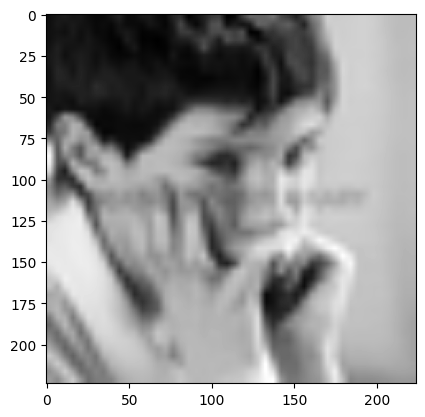

In [65]:
plt.imshow(train_set.__getitem__(3)[0].permute(1, 2, 0)[:, :, 0], cmap='gray')